In [7]:
FILE_PATH = "results_trec_covid.txt"
# FILE_PATH = "results_webis.txt"
# FILE_PATH = "results_msmarco.txt"

In [8]:
import pandas as pd
import numpy as np
import re
from collections import defaultdict


def load_data(f=FILE_PATH):

    # Read the file
    with open(f, "r") as f:
        lines = f.readlines()

    # Initialize a dictionary to store parsed data
    data = {"Subset": [], "nDCG@10": [], "MAP": [], "MRR": []}

    # Temporary variables
    subset = None

    # Iterate through lines to extract information
    for line in lines:
        line = line.strip()
        if line.startswith("Subset"):
            subset = int(re.search(r'\d+', line).group())  # Extract subset number
        elif line.startswith("nDCG@10"):
            ndcg = float(line.split(":")[1].strip())
        elif line.startswith("MAP"):
            map_val = float(line.split(":")[1].strip())
        elif line.startswith("MRR"):
            mrr = float(line.split(":")[1].strip())
            # Append extracted values to dictionary
            data["Subset"].append(subset)
            data["nDCG@10"].append(ndcg)
            data["MAP"].append(map_val)
            data["MRR"].append(mrr)

    # Convert dictionary to DataFrame
    df = pd.DataFrame(data)

    return df

def load_data_avg():

    all_data = [load_data(d) for d in ["results_trec_covid.txt", "results_webis.txt", "results_msmarco.txt"]]

    # Initialize a defaultdict to collect all values by subset
    combined = defaultdict(lambda: {"nDCG@10": [], "MAP": [], "MRR": []})

    # Populate the defaultdict
    for data in all_data:
        for i, subset in enumerate(data["Subset"]):
            combined[subset]["nDCG@10"].append(data["nDCG@10"][i])
            combined[subset]["MAP"].append(data["MAP"][i])
            combined[subset]["MRR"].append(data["MRR"][i])

    # Compute averages
    final_data = {"Subset": [], "nDCG@10": [], "MAP": [], "MRR": []}
    for subset, metrics in combined.items():
        final_data["Subset"].append(subset)
        final_data["nDCG@10"].append(np.mean(metrics["nDCG@10"]))
        final_data["MAP"].append(np.mean(metrics["MAP"]))
        final_data["MRR"].append(np.mean(metrics["MRR"]))

    df = pd.DataFrame(final_data)

    return df

In [9]:
import itertools

paraphrases = [
    "Improve the search effectiveness by suggesting expansion terms for the query",
    "Recommend expansion terms for the query to improve search results",
    "Improve the search effectiveness by suggesting useful expansion terms for the query",
    "Maximize search utility by suggesting relevant expansion phrases for the query",
    "Enhance search efficiency by proposing valuable terms to expand the query",
    "Elevate search performance by recommending relevant expansion phrases for the query",
    "Boost the search accuracy by providing helpful expansion terms to enrich the query",
    "Increase the search efficacy by offering beneficial expansion keywords for the query",
    "Optimize search results by suggesting meaningful expansion terms to enhance the query",
    "Enhance search outcomes by recommending beneficial expansion terms to supplement the query"
]
all_paraphrase_subsets = [subset for L in range(1, len(paraphrases) + 1) for subset in itertools.combinations(paraphrases, L)]

def subset_num_to_paraphrases(num):
    return all_paraphrase_subsets[num]

In [10]:
# df = load_data()
df = load_data_avg()

df_sorted = df.sort_values(by='nDCG@10', ascending=False)
print('Highest nDCG@10 score:\n')
print(df_sorted.head(1))

print('\nSubset:')
print(subset_num_to_paraphrases(int(df_sorted.iloc[0]['Subset'])))

Highest nDCG@10 score:

   Subset   nDCG@10       MAP       MRR
1       1  0.452837  0.238742  0.678197

Subset:
('Recommend expansion terms for the query to improve search results',)


In [11]:
df_sorted = df.sort_values(by='MAP', ascending=False)
print('Highest MAP score:\n')
print(df_sorted.head(1))

print('\nSubset:')
print(subset_num_to_paraphrases(int(df_sorted.iloc[0]['Subset'])))

Highest MAP score:

     Subset   nDCG@10       MAP       MRR
271     271  0.451982  0.240604  0.688535

Subset:
('Recommend expansion terms for the query to improve search results', 'Improve the search effectiveness by suggesting useful expansion terms for the query', 'Elevate search performance by recommending relevant expansion phrases for the query', 'Increase the search efficacy by offering beneficial expansion keywords for the query')


In [12]:
df_sorted = df.sort_values(by='MRR', ascending=False)
print('Highest MRR score:\n')
print(df_sorted.head(1))

print('\nSubset:')
print(subset_num_to_paraphrases(int(df_sorted.iloc[0]['Subset'])))

Highest MRR score:

     Subset   nDCG@10       MAP       MRR
332     332  0.446523  0.236218  0.708831

Subset:
('Improve the search effectiveness by suggesting useful expansion terms for the query', 'Enhance search efficiency by proposing valuable terms to expand the query', 'Elevate search performance by recommending relevant expansion phrases for the query', 'Optimize search results by suggesting meaningful expansion terms to enhance the query')


In [13]:
# Avg per subset size

def filter_condition(subset_num, subset_size):
    return len(subset_num_to_paraphrases(subset_num)) == subset_size

all_averages = []

for i in range(1, 11):
    averages = {}
    averages["Subset size"] = i
    filtered_df = df[df["Subset"].apply(lambda x: filter_condition(x, i))]
    averages["nDCG@10"] = filtered_df["nDCG@10"].mean()
    averages["MAP"] = filtered_df["MAP"].mean()
    averages["MRR"] = filtered_df["MRR"].mean()
    all_averages.append(averages)

print(pd.DataFrame(all_averages))

   Subset size   nDCG@10       MAP       MRR
0            1  0.433482  0.227988  0.669127
1            2  0.434276  0.230136  0.668303
2            3  0.435946  0.231687  0.667966
3            4  0.437063  0.233346  0.668983
4            5  0.438424  0.234475  0.671241
5            6  0.438983  0.235250  0.670496
6            7  0.438783  0.235725  0.668148
7            8  0.439340  0.236065  0.666238
8            9  0.439588  0.236526  0.665874
9           10  0.439707  0.236089  0.665640


In [14]:
# Avg per paraphrase

def filter_condition(subset_num, paraphrase):
    if paraphrase in subset_num_to_paraphrases(subset_num):
        return True
    return False

all_averages = []

for i in range(0, 10):
    averages = {}
    averages["Paraphrase"] = paraphrases[i]
    filtered_df = df[df["Subset"].apply(lambda x: filter_condition(x, paraphrases[i]))]
    averages["nDCG@10"] = filtered_df["nDCG@10"].mean()
    averages["MAP"] = filtered_df["MAP"].mean()
    averages["MRR"] = filtered_df["MRR"].mean()
    all_averages.append(averages)

print(pd.DataFrame(all_averages))

                                          Paraphrase   nDCG@10       MAP  \
0  Improve the search effectiveness by suggesting...  0.438485  0.234423   
1  Recommend expansion terms for the query to imp...  0.439335  0.235347   
2  Improve the search effectiveness by suggesting...  0.440452  0.235536   
3  Maximize search utility by suggesting relevant...  0.435511  0.233734   
4  Enhance search efficiency by proposing valuabl...  0.437806  0.234183   
5  Elevate search performance by recommending rel...  0.439037  0.234631   
6  Boost the search accuracy by providing helpful...  0.438573  0.234536   
7  Increase the search efficacy by offering benef...  0.438559  0.235252   
8  Optimize search results by suggesting meaningf...  0.438639  0.234763   
9  Enhance search outcomes by recommending benefi...  0.435879  0.233114   

        MRR  
0  0.668180  
1  0.667064  
2  0.669884  
3  0.666157  
4  0.669416  
5  0.671995  
6  0.668477  
7  0.671841  
8  0.672741  
9  0.668611  


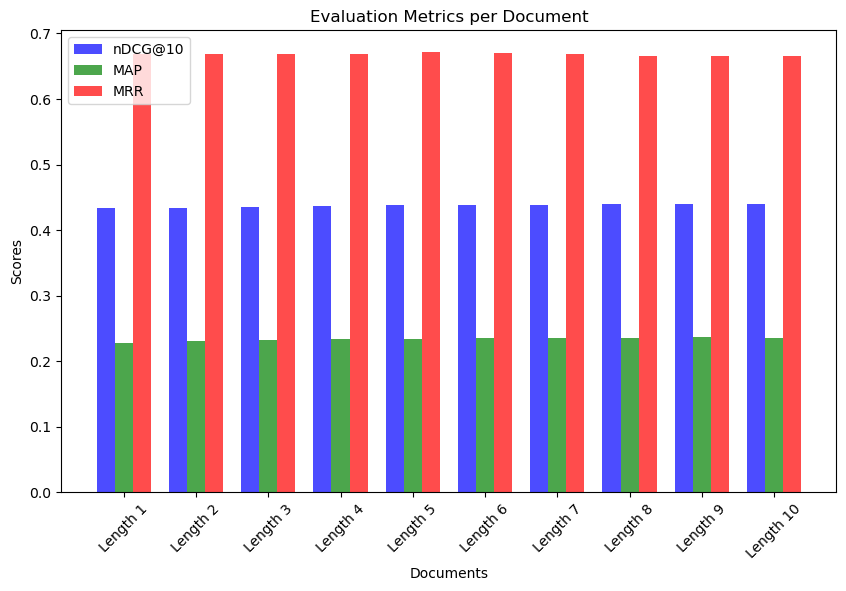

In [15]:
import matplotlib.pyplot as plt
import numpy as np

def getMeanEvaluationforLength(eval, i):
    return df.loc[df.apply(lambda row: len(subset_num_to_paraphrases(int(row['Subset']))) == i, axis=1), eval].mean()

# Sample data
x_labels = [f'Length {i+1}' for i in range(10)]
nDCG_10 = [getMeanEvaluationforLength('nDCG@10', i+1) for i in range(10)]
MAP = [getMeanEvaluationforLength('MAP', i+1) for i in range(10)]
MRR = [getMeanEvaluationforLength('MRR', i+1) for i in range(10)]

x = np.arange(len(x_labels))  # Label locations
width = 0.25  # Bar width

fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars
ax.bar(x - width, nDCG_10, width, label='nDCG@10', color='blue', alpha=0.7)
ax.bar(x, MAP, width, label='MAP', color='green', alpha=0.7)
ax.bar(x + width, MRR, width, label='MRR', color='red', alpha=0.7)

# Labels and title
ax.set_xlabel("Documents")
ax.set_ylabel("Scores")
ax.set_title("Evaluation Metrics per Document")
ax.set_xticks(x)
ax.set_xticklabels(x_labels, rotation=45)
ax.legend()

plt.show()


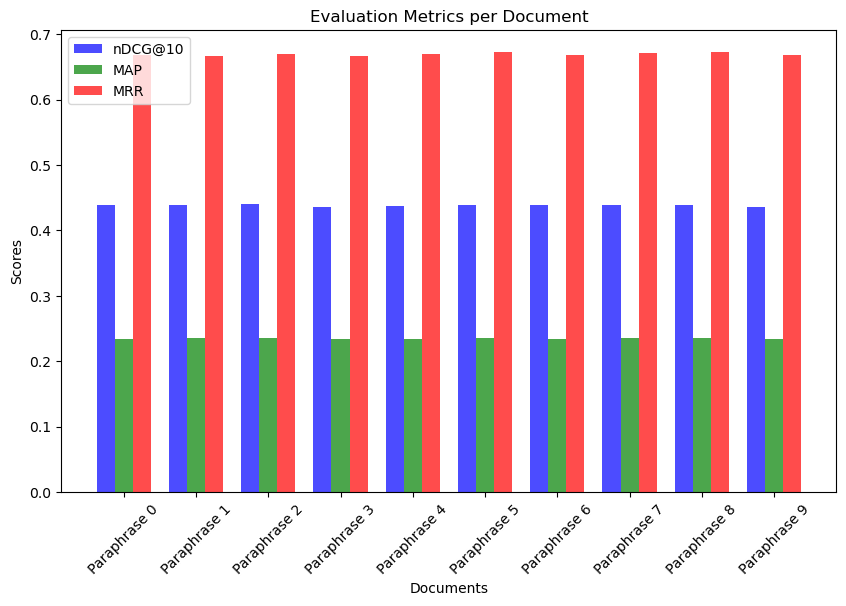

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def getMeanEvaluationforParaphrase(eval, i):
    return df.loc[df.apply(lambda row: paraphrases[i] in subset_num_to_paraphrases(int(row['Subset'])), axis=1), eval].mean()

# Sample data
x_labels = [f'Paraphrase {i}' for i in range(10)]
nDCG_10 = [getMeanEvaluationforParaphrase('nDCG@10', i) for i in range(10)]
MAP = [getMeanEvaluationforParaphrase('MAP', i) for i in range(10)]
MRR = [getMeanEvaluationforParaphrase('MRR', i) for i in range(10)]

x = np.arange(len(x_labels))  # Label locations
width = 0.25  # Bar width

fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars
ax.bar(x - width, nDCG_10, width, label='nDCG@10', color='blue', alpha=0.7)
ax.bar(x, MAP, width, label='MAP', color='green', alpha=0.7)
ax.bar(x + width, MRR, width, label='MRR', color='red', alpha=0.7)

# Labels and title
ax.set_xlabel("Documents")
ax.set_ylabel("Scores")
ax.set_title("Evaluation Metrics per Document")
ax.set_xticks(x)
ax.set_xticklabels(x_labels, rotation=45)
ax.legend()

plt.show()